In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, kstest, spearmanr
from scipy import stats

In [2]:
# Read data CSV Saas Sales

df_saas_sales = pd.read_csv('SaaS-Sales.csv')

df_saas_sales.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [3]:
# Memahami data menggunakan .info() untuk melihat tipe data setiap kolom
# Melihat apakah ada kolom yang tidak sesuai tipe datanya

df_saas_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [4]:
# Mengubah tipe data menjadi tipe data yang benar
# Order Date sebelumnya memiliki tipe data object, seharusnya Order Date memiliki tipe data datetime
# Order ID sebelumnya memiliki tipe data object, seharusnya Order ID memiliki tipe data int64

df_saas_sales['Order Date'] = pd.to_datetime(df_saas_sales['Order Date'])
df_saas_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [5]:
# Drop kolom yang tidak dibutuhkan untuk analisis: Row ID dan Date Key
# Alasan drop Row ID: Karena valuenya adalah angka untuk setiap baris yang sebenarnya sudah direpresentasikan oleh Index dari dataframe
# Alasan drop Date Key: Karena valuenya adalah representasi numerik dari kolom Order Date. Kolom Date Key ini belum dibutuhkan dalam analisa kita kali ini

df_saas_sales.drop(columns = ['Row ID', 'Date Key'], inplace = True)

In [107]:
# Menambahkan kolom baru untuk menghitung Profit Margin (dalam %)

df_saas_sales['Profit Margin (%)'] = (df_saas_sales['Profit'] / df_saas_sales['Sales']) * 100
df_saas_sales['Profit Margin (%)'] = df_saas_sales['Profit Margin (%)'].round(1)

In [108]:
# Memahami data menggunakan .describe()
# Untuk sekilas, datanya terdistribusi normal, karena mean dan mediannya

df_saas_sales.describe()

,Customer ID,Sales,Quantity,Discount,Profit,Profit Margin (%)
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,1049.771963,229.858001,3.789574,0.156203,28.656896,12.030678
std,29.719388,623.245101,2.225110,0.206452,234.260108,46.675336
min,1001.000000,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,1024.000000,17.280000,2.000000,0.000000,1.728750,7.500000
50%,1049.000000,54.490000,3.000000,0.200000,8.666500,27.000000
75%,1076.000000,209.940000,5.000000,0.200000,29.364000,36.200000
max,1101.000000,22638.480000,14.000000,0.800000,8399.976000,50.000000


In [7]:
# Melihat apakah ada data Null, Duplicate atau N/A

print(f'Cek apakah ada data yang Null: \n{df_saas_sales.isnull().sum()}')
print(f'Cek apakah ada data yang duplicate: \n{df_saas_sales.duplicated().sum()}')
print(f'Cek apakah ada data yang N/A: \n{df_saas_sales.isna().sum()}')

Cek apakah ada data yang Null: 
Order ID        0
Order Date      0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64
Cek apakah ada data yang duplicate: 
0
Cek apakah ada data yang N/A: 
Order ID        0
Order Date      0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


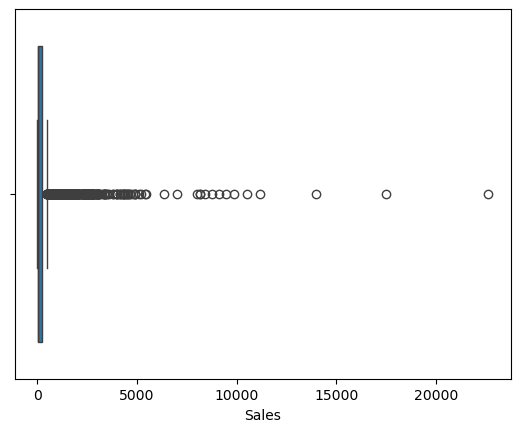

In [8]:
# Melihat persebaran data outlier dikolom Sales

df_saas_sales_boxplot = sns.boxplot(
    data = df_saas_sales['Sales'],
    orient = 'y'
)
plt.show(df_saas_sales_boxplot)

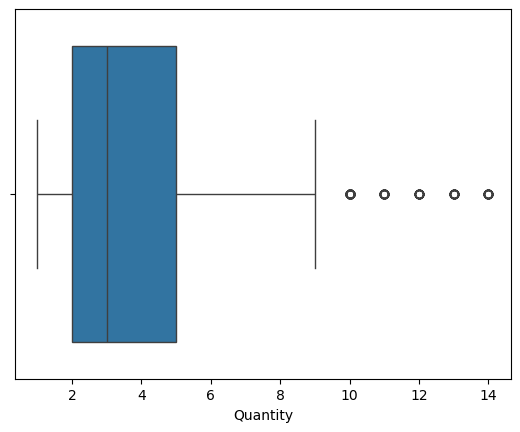

In [9]:
# Melihat persebaran data outlier dikolom Quantity

df_saas_quantity_boxplot = sns.boxplot(
    data = df_saas_sales['Quantity'],
    orient = 'y'
)
plt.show(df_saas_quantity_boxplot)


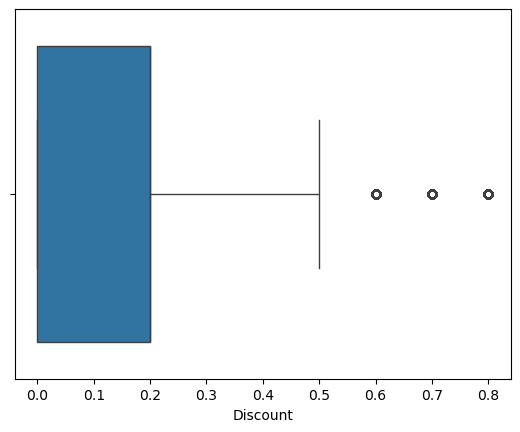

In [10]:
# Melihat persebaran data outlier dikolom Discount

df_saas_Discount_boxplot = sns.boxplot(
    data = df_saas_sales['Discount'],
    orient = 'y'
)
plt.show(df_saas_Discount_boxplot)

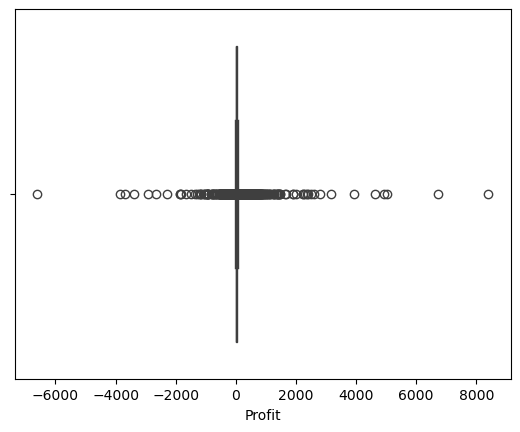

In [11]:
# Melihat persebaran data outlier dikolom Profit

df_saas_profit_boxplot = sns.boxplot(
    data = df_saas_sales['Profit'],
    orient = 'y'
)
plt.show(df_saas_profit_boxplot)

Data df_saas_sales: Cek apakah setiap kolom numerik (Sales, Quantity, Discount, Profit) berdistribusi normal, Ada beberapa cara untuk mengetahui distribusi normal: 
* Visualisasi Diagram (eg. Q-Q Plot)
* Uji Frequentist (eg. Kolmogorov Smirnov, Shapiro Wilk, D'Agostino and Pearson)

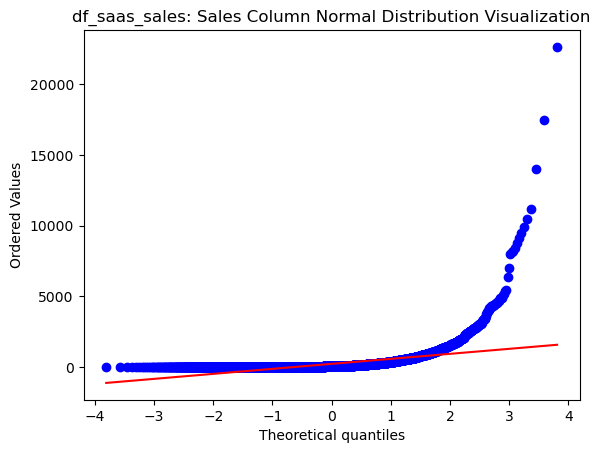

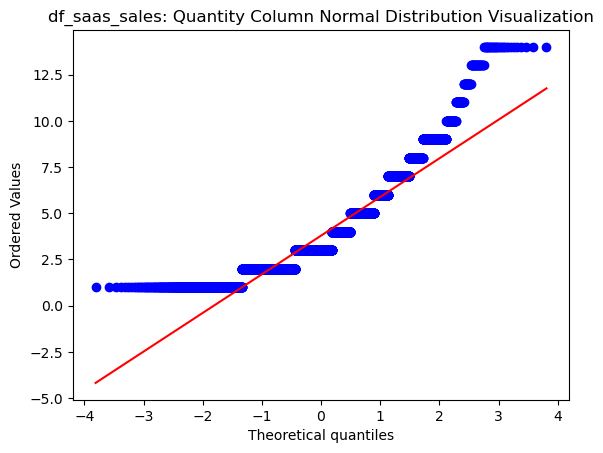

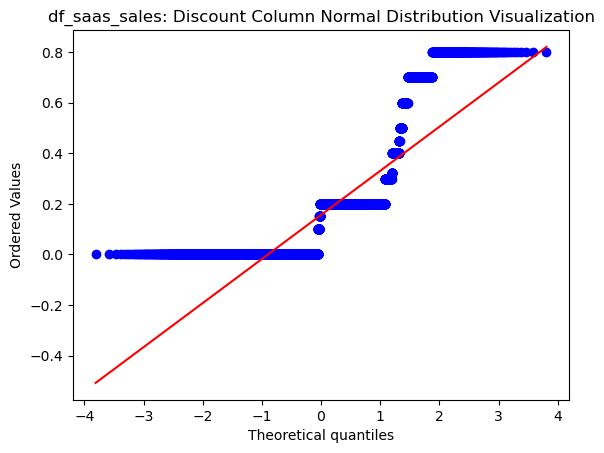

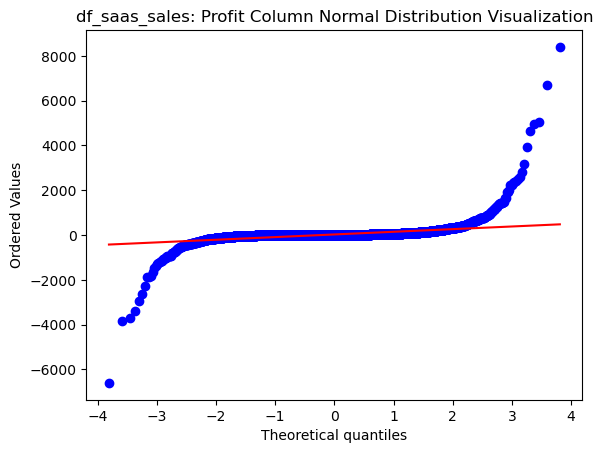

In [12]:
# Uji Distribusi Normal dengan Q-Q Plot

# Kolom Sales
sales_normal_distribution_qqplot = stats.probplot(df_saas_sales['Sales'], dist = 'norm', plot = plt)
plt.title('df_saas_sales: Sales Column Normal Distribution Visualization')
plt.show(sales_normal_distribution_qqplot)

# Kolom Quantity
quantity_normal_distribution_qqplot = stats.probplot(df_saas_sales['Quantity'], dist = 'norm', plot = plt)
plt.title('df_saas_sales: Quantity Column Normal Distribution Visualization')
plt.show(quantity_normal_distribution_qqplot)

# Kolom Discount
discount_normal_distribution_qqplot = stats.probplot(df_saas_sales['Discount'], dist = 'norm', plot = plt)
plt.title('df_saas_sales: Discount Column Normal Distribution Visualization')
plt.show(discount_normal_distribution_qqplot)

# Kolom Profit
profit_normal_distribution_qqplot = stats.probplot(df_saas_sales['Profit'], dist = 'norm', plot = plt)
plt.title('df_saas_sales: Profit Column Normal Distribution Visualization')
plt.show(profit_normal_distribution_qqplot)

df_saas_sales: Uji Distribusi Normal dengan Uji Frequentist

In [13]:
# Kolom Sales 

# Menggunakan Kolmogrov Smirnov
statistic, kstestpvalue = kstest(df_saas_sales['Sales'], 'norm')
print(f'Kolmogorov Smirnov Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan D'Agostino and Pearson
statistic, pearsonpvalue = normaltest(df_saas_sales['Sales'])
print(f'Pearson Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

Kolmogorov Smirnov Test Result: Data tidak terdistribusi Normal
Pearson Test Result: Data tidak terdistribusi Normal


In [14]:
# Kolom Quantity 

# Menggunakan Kolmogrov Smirnov
statistic, kstestpvalue = kstest(df_saas_sales['Quantity'], 'norm')
print(f'Kolmogorov Smirnov Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan D'Agostino and Pearson
statistic, pearsonpvalue = normaltest(df_saas_sales['Quantity'])
print(f'Pearson Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

Kolmogorov Smirnov Test Result: Data tidak terdistribusi Normal
Pearson Test Result: Data tidak terdistribusi Normal


In [15]:
# Kolom Discount 

# Menggunakan Kolmogrov Smirnov
statistic, kstestpvalue = kstest(df_saas_sales['Discount'], 'norm')
print(f'Kolmogorov Smirnov Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')


# Menggunakan D'Agostino and Pearson
statistic, pearsonpvalue = normaltest(df_saas_sales['Discount'])
print(f'Pearson Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

Kolmogorov Smirnov Test Result: Data tidak terdistribusi Normal
Pearson Test Result: Data tidak terdistribusi Normal


In [16]:
# Kolom Profit 

# Menggunakan Kolmogrov Smirnov
statistic, kstestpvalue = kstest(df_saas_sales['Profit'], 'norm')
print(f'Kolmogorov Smirnov Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan D'Agostino and Pearson
statistic, pearsonpvalue = normaltest(df_saas_sales['Profit'])
print(f'Pearson Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

Kolmogorov Smirnov Test Result: Data tidak terdistribusi Normal
Pearson Test Result: Data tidak terdistribusi Normal


Setelah melakukan uji distribusi normal untuk semua kolom numerik (Sales, Quantity, Discount, Profit) tidak ada yang berdistribusi normal

Selanjutnya, kita bisa melakukan uji korelasi antar kolom numerik menggunakan method spearman

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.327426 -0.056969  0.518407
Quantity  0.327426  1.000000 -0.000878  0.234491
Discount -0.056969 -0.000878  1.000000 -0.543350
Profit    0.518407  0.234491 -0.543350  1.000000


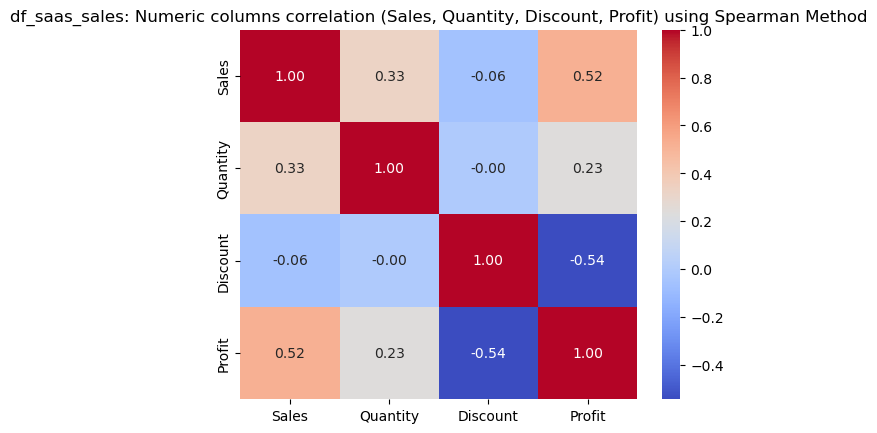

In [17]:
spearman_corr = df_saas_sales[['Sales', 'Quantity', 'Discount', 'Profit']].corr(method='spearman')
print(spearman_corr)

sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('df_saas_sales: Numeric columns correlation (Sales, Quantity, Discount, Profit) using Spearman Method')
plt.show()

Visualisasi untuk melihat Produk dengan Penjualan (Sales) terbanyak ke paling sedikit

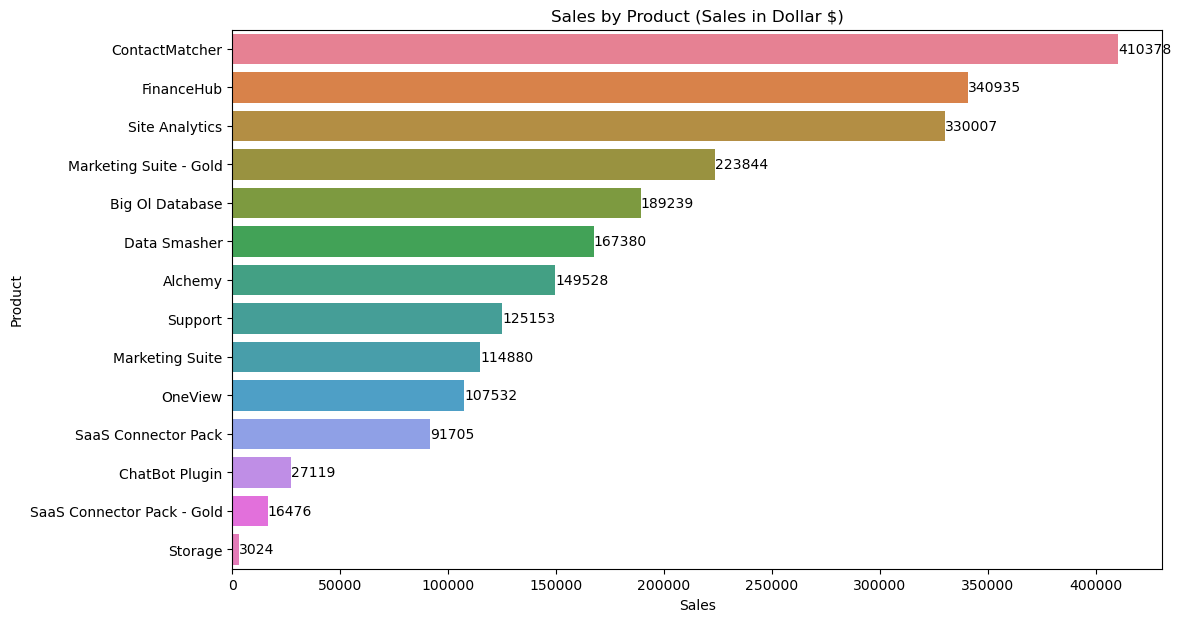

In [18]:
plt.figure(figsize=(12, 7))
sales_by_product = df_saas_sales.groupby('Product')['Sales'].sum().sort_values(ascending = False).reset_index()
sales_by_product_barplot = sns.barplot(
    data = sales_by_product,
    x = 'Sales',
    y = 'Product',
    hue = 'Product'
)
for container in sales_by_product_barplot.containers:
    sales_by_product_barplot.bar_label(container, fmt='%.0f')
plt.title('Sales by Product (Sales in Dollar $)')
plt.show()

Visualisasi untuk melihat Produk dengan Profit terbanyak ke paling sedikit

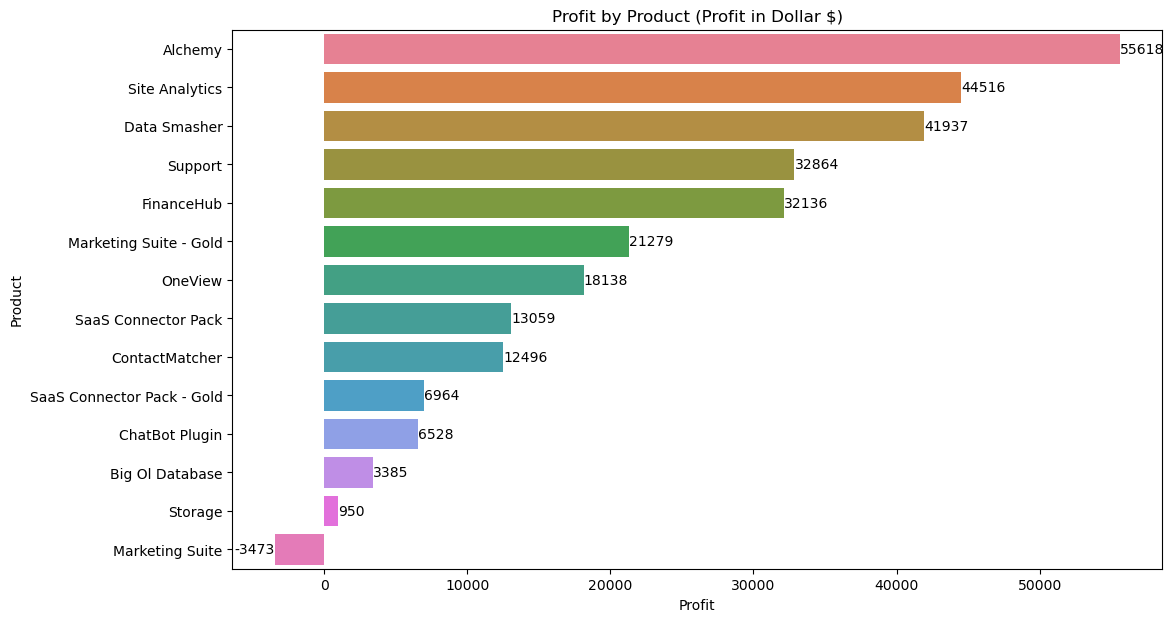

In [19]:
plt.figure(figsize=(12, 7))
profit_by_product = df_saas_sales.groupby('Product')['Profit'].sum().sort_values(ascending = False).reset_index()
profit_by_product_barplot = sns.barplot(
    data = profit_by_product,
    x = 'Profit',
    y = 'Product',
    hue = 'Product'
)
for container in profit_by_product_barplot.containers:
    profit_by_product_barplot.bar_label(container, fmt='%.0f')
plt.title('Profit by Product (Profit in Dollar $)')
plt.show()

Visualisasi untuk melihat produk (Product) dengan Profit Margin dari tertinggi ke paling rendah

In [115]:
profit_margin_by_product = df_saas_sales.groupby('Product')['Profit Margin (%)'].sum().sort_values(ascending = False).reset_index()
profit_margin_by_product

,Product,Profit Margin (%)
0,Support,60430.3
1,ChatBot Plugin,20029.2
2,FinanceHub,18349.5
3,Data Smasher,16910.8
4,SaaS Connector Pack,13116.2
5,SaaS Connector Pack - Gold,10748.5
6,Site Analytics,10598.2
7,Marketing Suite - Gold,7538.7
8,Storage,6491.8
9,Alchemy,2157.1


Visualisasi Penjualan (Sales) berdasarkan Negara (Country) dari 5 Negara dengan Penjualan terbanyak ke paling sedikit

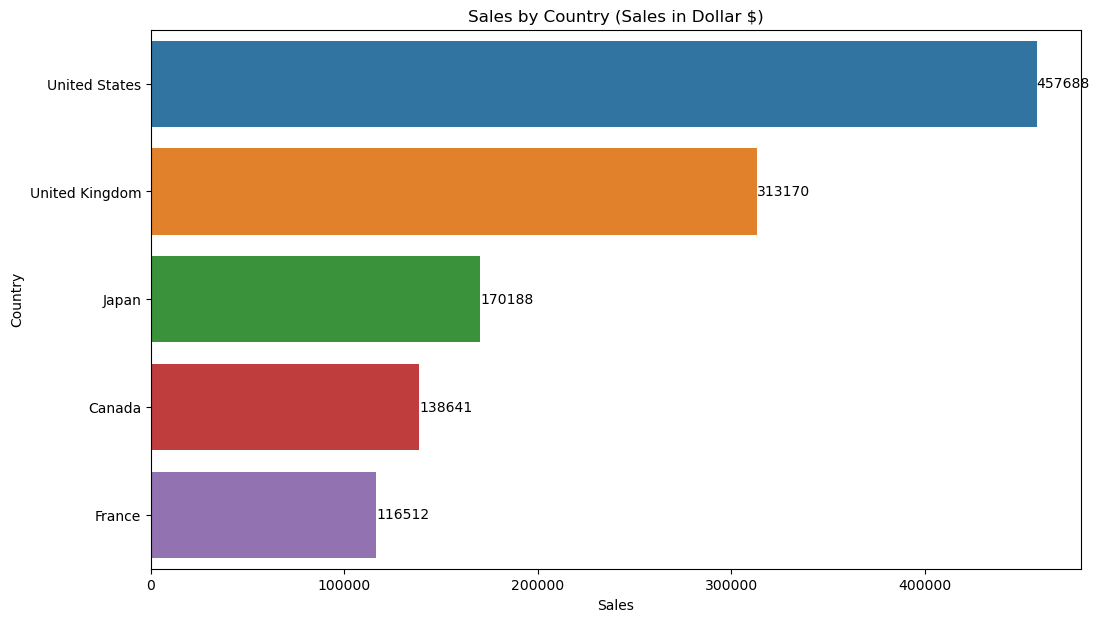

In [20]:
plt.figure(figsize=(12, 7))
sales_by_country = df_saas_sales.groupby('Country')['Sales'].sum().sort_values(ascending = False).reset_index().head(5)
sales_by_country_barplot = sns.barplot(
    data = sales_by_country,
    x = 'Sales',
    y = 'Country',
    hue = 'Country'
)
for container in sales_by_country_barplot.containers:
    sales_by_country_barplot.bar_label(container, fmt='%.0f')
plt.title('Sales by Country (Sales in Dollar $)')
plt.show()

Visualisasi Profit berdasarkan Negara (Country) dari 5 Negara dengan Penjualan terbanyak ke paling sedikit

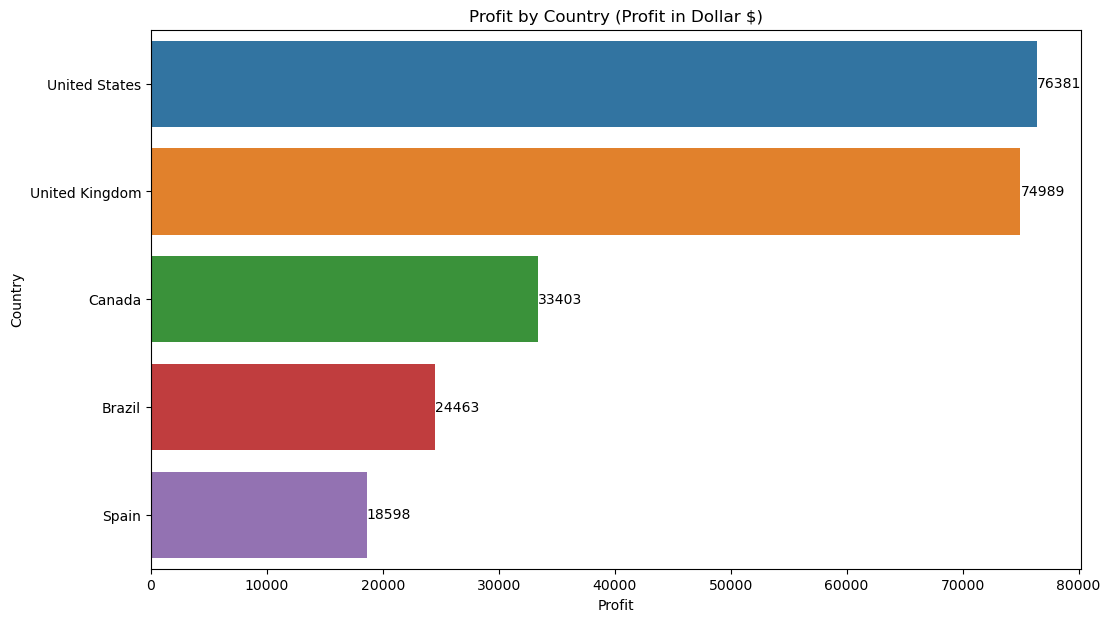

In [21]:
plt.figure(figsize=(12, 7))
sales_by_country = df_saas_sales.groupby('Country')['Profit'].sum().sort_values(ascending = False).reset_index().head(5)
sales_by_country_barplot = sns.barplot(
    data = sales_by_country,
    x = 'Profit',
    y = 'Country',
    hue = 'Country'
)
for container in sales_by_country_barplot.containers:
    sales_by_country_barplot.bar_label(container, fmt='%.0f')
plt.title('Profit by Country (Profit in Dollar $)')
plt.show()

Visualisasi jumlah kuantitas (Quantity) untuk setiap Product

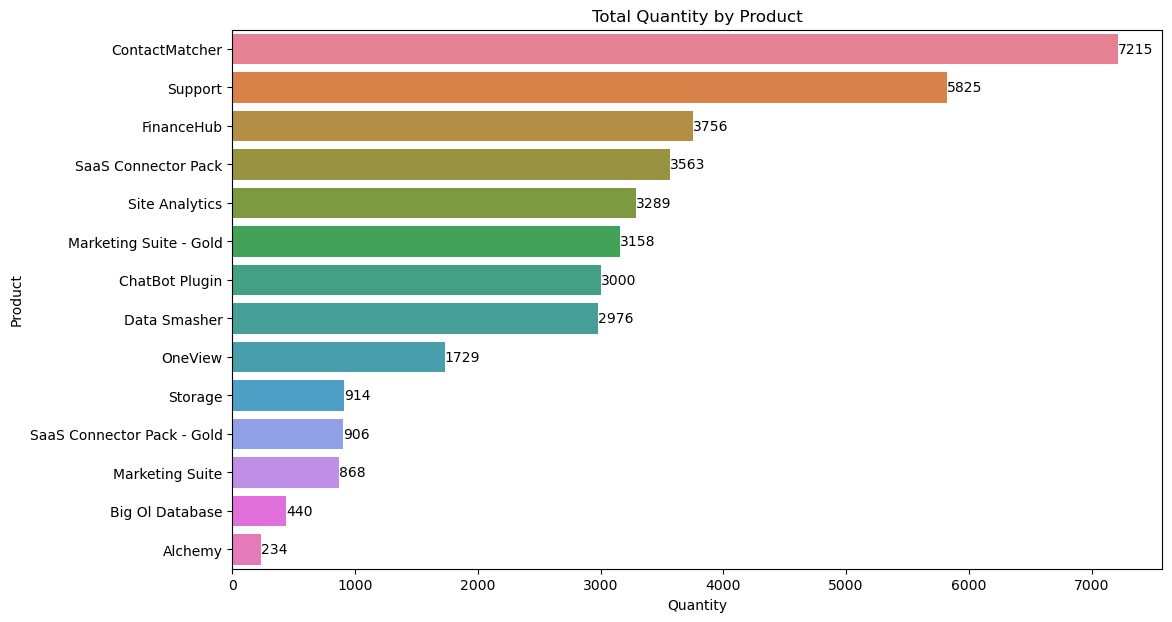

In [90]:
plt.figure(figsize=(12, 7))
total_quantity_by_product = df_saas_sales.groupby('Product')['Quantity'].sum().sort_values(ascending = False).reset_index()
total_quantity_by_product_barplot = sns.barplot(
    data = total_quantity_by_product,
    x = 'Quantity',
    y = 'Product',
    hue = 'Product'
)
for container in total_quantity_by_product_barplot.containers:
    total_quantity_by_product_barplot.bar_label(container, fmt='%.0f')
plt.title('Total Quantity by Product')
plt.show()

Visualisasi berapa jumlah negara (Country) yang membeli sebuah product beserta total sales dan total profit 

In [86]:
product_summary = df_saas_sales.groupby('Product').agg({
    'Country': 'nunique',
    'Sales': 'sum',
    'Discount': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum'

}).sort_values(by = 'Quantity', ascending = True).reset_index()

product_summary.columns = ['Product', 'Unique Countries', 'Total Sales', 'Total Discount', 'Total Quantity', 'Total Profit']

product_summary

,Product,Unique Countries,Total Sales,Total Discount,Total Quantity,Total Profit
0,Alchemy,22,149528.0300,11.00,234,55617.8249
1,Big Ol Database,25,189238.6310,35.20,440,3384.7569
2,Marketing Suite,33,114879.9963,48.14,868,-3472.5560
3,SaaS Connector Pack - Gold,33,16476.4020,20.40,906,6964.1767
4,Storage,36,3024.2800,17.80,914,949.5182
5,OneView,40,107532.1610,77.60,1729,18138.0054
6,Data Smasher,44,167380.3180,60.80,2976,41936.6357
7,ChatBot Plugin,43,27118.7920,59.60,3000,6527.7870
8,Marketing Suite - Gold,43,223843.6080,63.20,3158,21278.8264
9,Site Analytics,43,330007.0540,137.40,3289,44515.7306


Visualisasi Total Penjualan (Sales) dan Total Keuntungan (Profit) by Product

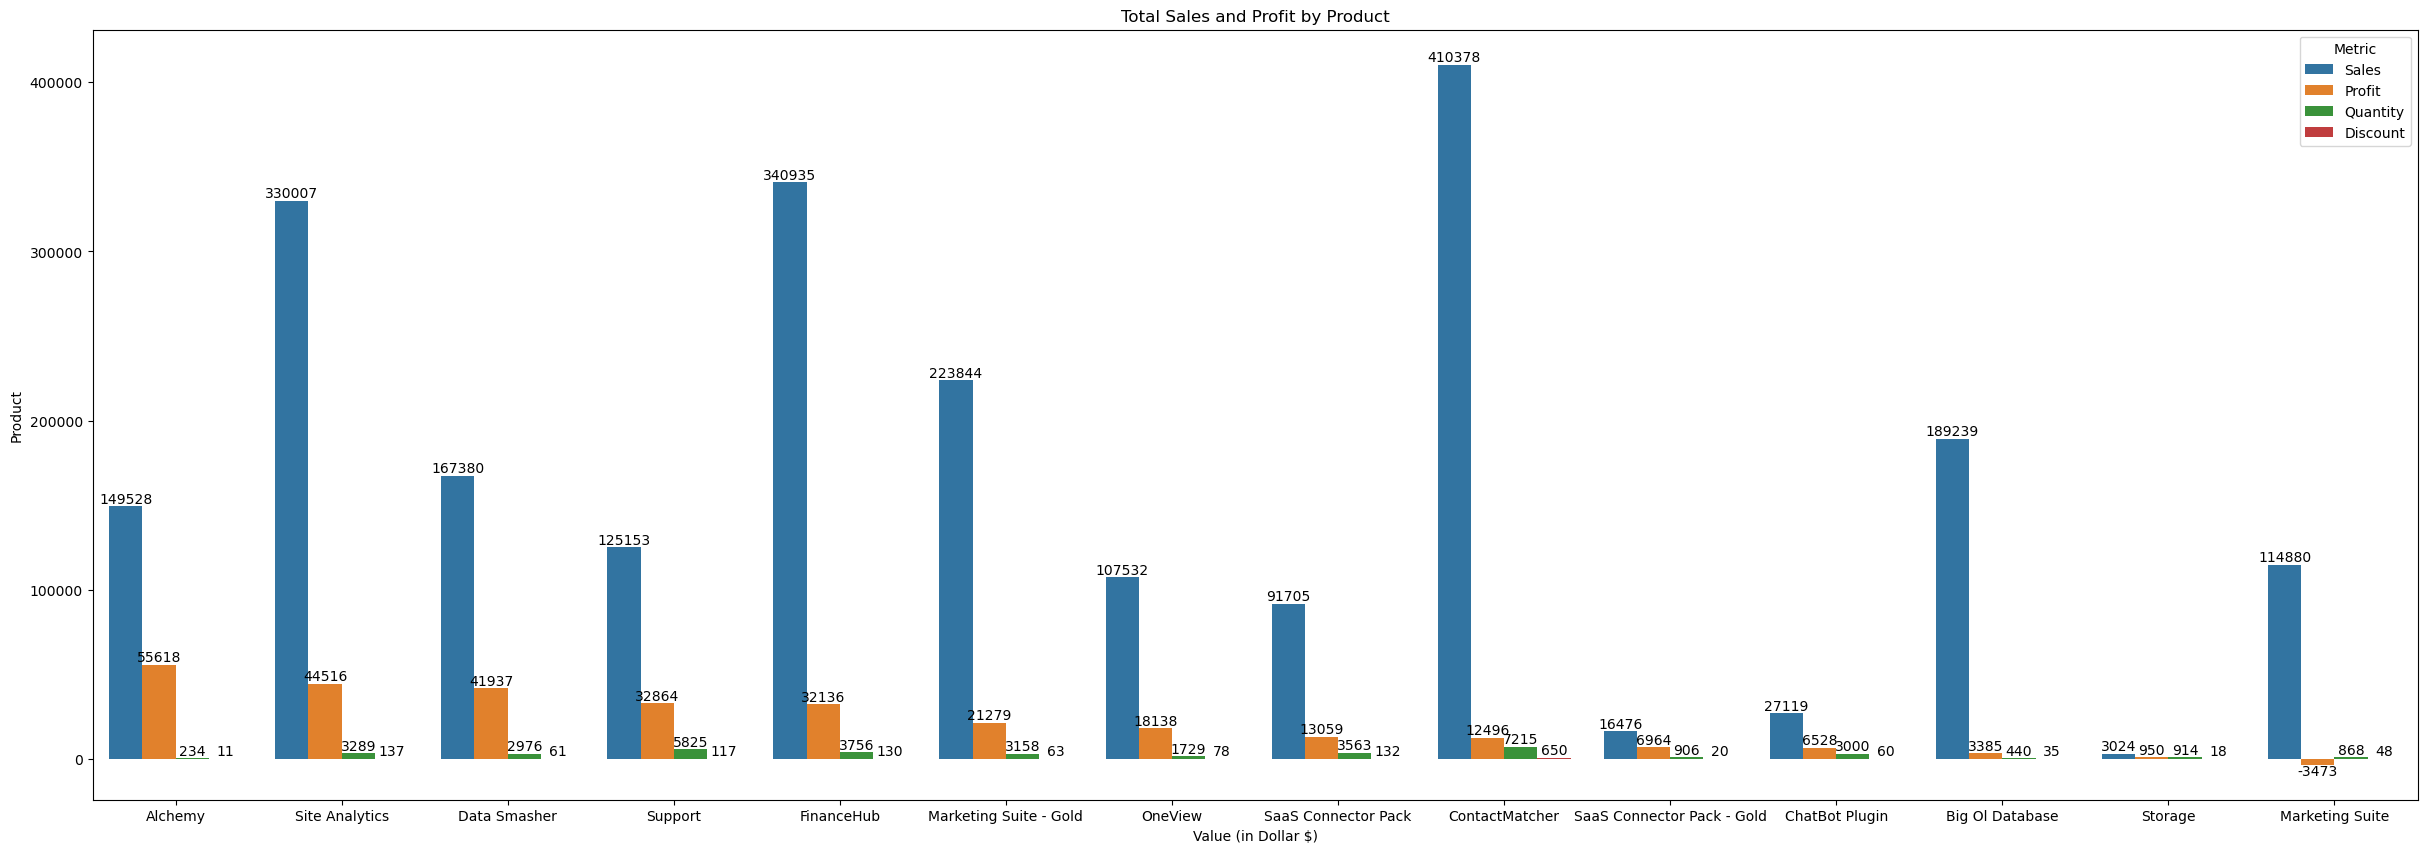

In [104]:
# Mengelompokkan data berdasarkan produk dan menghitung total sales dan total profit untuk setiap produk
product_sales_profit = df_saas_sales.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Discount': 'sum'
}).sort_values(by = 'Profit', ascending = False).reset_index()

# Membuat visualisasi barplot untuk total sales dan total profit setiap produk
plt.figure(figsize=(30, 10))
product_sales_profit_barplot = sns.barplot(
    data=product_sales_profit.melt(id_vars='Product', value_vars=['Sales', 'Profit', 'Quantity', 'Discount']),
    x='Product',
    y='value',
    hue='variable'
)

for container in product_sales_profit_barplot.containers:
    product_sales_profit_barplot.bar_label(container, fmt='%.0f')

plt.title('Total Sales and Profit by Product')
plt.xlabel('Value (in Dollar $)')
plt.ylabel('Product')
plt.legend(title='Metric')
plt.show()

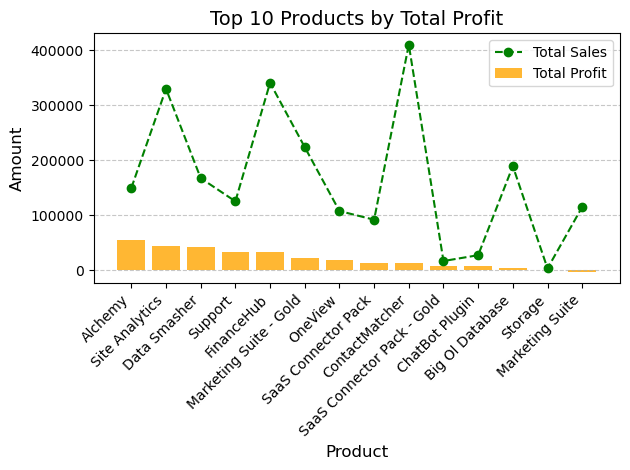

In [105]:
plt.bar(product_sales_profit['Product'], product_sales_profit['Profit'], color='orange', alpha=0.8, label='Total Profit')

# Line chart for Total Sales
plt.plot(product_sales_profit['Product'], product_sales_profit['Sales'], color='green', marker='o', linestyle='dashed', label='Total Sales')

# Customize the plot
plt.title('Total Sales and Profit by Product', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Visualisasi Impact Discount terhadap Profit dan Sales

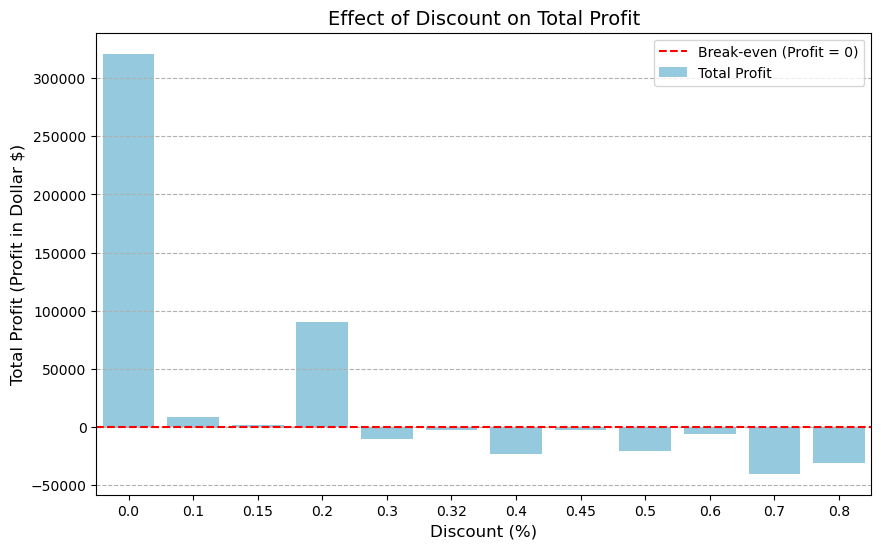

In [70]:
discount_profit_sum_analysis = df_saas_sales.groupby('Discount')['Profit'].sum().reset_index()

# Plot the total profit by discount
plt.figure(figsize=(10, 6))
sns.barplot(data=discount_profit_sum_analysis, x='Discount', y='Profit', color='skyblue', label='Total Profit')
plt.axhline(0, color='red', linestyle='--', label='Break-even (Profit = 0)')
plt.title('Effect of Discount on Total Profit', fontsize=14)
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('Total Profit (Profit in Dollar $)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

Karena di setiap data numerik (Sales, Quantity, Discount, Profit) ada outlier, Harus dilakukan data cleansing untuk menghilangkan data outlier disetiap kolom numerk

Tapi saya tidak bisa langsung membuang semua data outlier, karena menurut saya data outlier ini masih relevan terhadap bisnis penjualan SAAS. Oleh karena itu, data outlier ini akan saya tampung di dataframe terpisah untuk melakukan analisis terpisah

Saya Akan melakukan 2 analisis menggunakan 2 data yang berbeda: Data yang Normal (Tidak ada outlier) dan Data yang tidak Normal (Ada outlier)

In [24]:
# Bikin fungsi untuk memisahkan data normal dan data outlier di kolom numerik (Sales, Quantity, Discount, Profit)

def remove_outliers_data(df, numeric_columns):
    all_outliers = pd.DataFrame()  # DataFrame untuk menyimpan semua outlier
    
    while True:
        # Hitung interquartile range hanya untuk kolom numerik
        q1_value = df[numeric_columns].quantile(0.25)
        q3_value = df[numeric_columns].quantile(0.75)
        interquartile_range = q3_value - q1_value

        # Tentukan batas bawah dan atas untuk menghitung data outlier
        lower_boundary = q1_value - 1.5 * interquartile_range
        upper_boundary = q3_value + 1.5 * interquartile_range

        # Identifikasi outlier (hanya untuk kolom numerik)
        is_outlier = (df[numeric_columns] < lower_boundary) | (df[numeric_columns] > upper_boundary)

        # Memisahkan data normal dan outlier
        data_normal = df[~is_outlier.any(axis=1)]
        data_outlier = df[is_outlier.any(axis=1)]

        # Simpan data outlier ke DataFrame terpisah
        all_outliers = pd.concat([all_outliers, data_outlier], ignore_index=True)

        if len(data_outlier) == 0:
            print("Tidak ada lagi outlier")
            break

        # Update df menjadi hanya data normal untuk iterasi berikutnya
        df = data_normal

    return data_normal, all_outliers

Setelah memisahkan data normal (tanpa outlier), data yang tersisa masih cukup banyak: 4115 rows untuk melakukan analisis

In [25]:
df_saas_sales_normal_data, data_saas_sales_outliers_data = remove_outliers_data(df_saas_sales, ['Sales', 'Quantity', 'Discount', 'Profit'])

df_saas_sales_normal_data


Tidak ada lagi outlier


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.620,2,0.0,6.8714
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.368,2,0.2,2.5164
5,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.860,7,0.0,14.1694
6,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.280,4,0.0,1.9656
8,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,XPBOBXWXA3,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,AMER-2022-157728,2022-09-23,Rebecca Dickens,Brazil,São Paulo,AMER,LATAM,Amazon,1004,Tech,SMB,Support,A3XS9BYHG8,35.560,7,0.0,16.7132
9985,EMEA-2021-100251,2021-05-17,Charles Lee,United Kingdom,Leeds,EMEA,UKIR,UnitedHealth Group,1092,Healthcare,SMB,Support,GM2B5HKSRM,55.600,4,0.0,16.1240
9986,AMER-2022-125794,2022-09-30,Lucas Oliver,United States,New York City,AMER,NAMER,Panasonic,1091,Tech,SMB,Data Smasher,PO8DG1HX3V,36.240,1,0.0,15.2208
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028


Memastikan apakah masih ada outlier untuk setiap kolom numerik (Sales, Quantity, Discount, Profit)

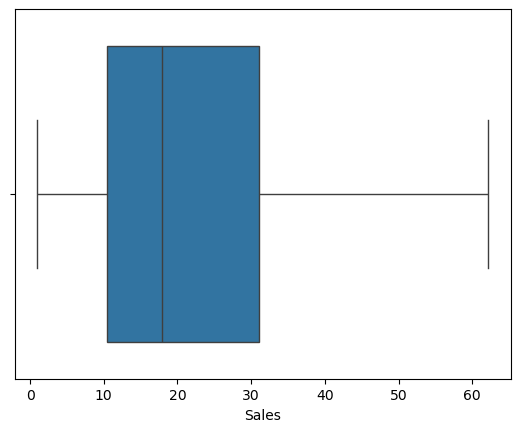

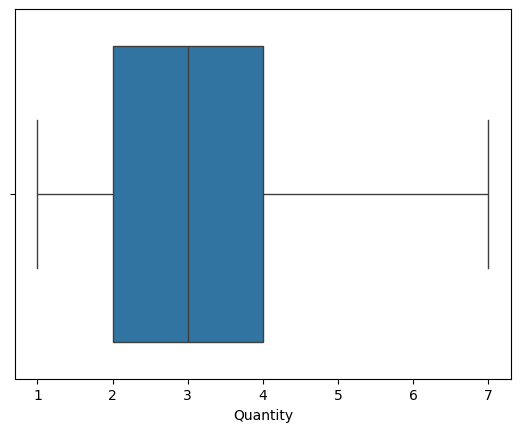

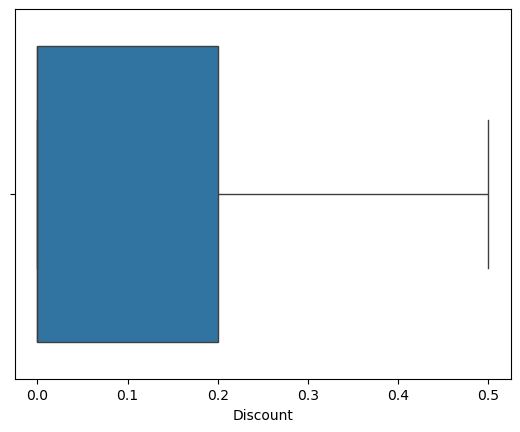

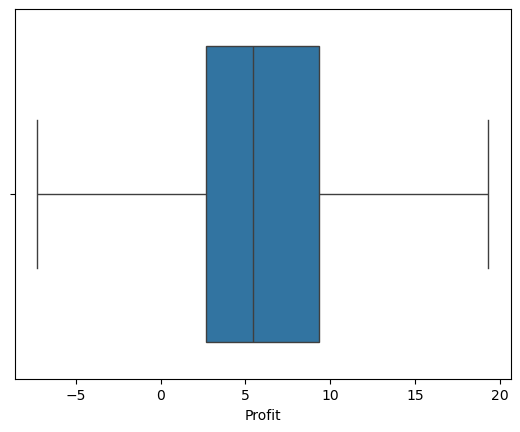

In [26]:
# Kolom Sales
sales_normal_data_boxplot = sns.boxplot(
    data = df_saas_sales_normal_data['Sales'],
    orient = 'y'
)
plt.show(sales_normal_data_boxplot)

# Kolom Quantity
quantity_normal_data_boxplot = sns.boxplot(
    data = df_saas_sales_normal_data['Quantity'],
    orient = 'y'
)
plt.show(quantity_normal_data_boxplot)

# Kolom Discount
discount_normal_data_boxplot = sns.boxplot(
    data = df_saas_sales_normal_data['Discount'],
    orient = 'y'
)
plt.show(discount_normal_data_boxplot)


# Kolom Profit
profit_normal_data_boxplot = sns.boxplot(
    data = df_saas_sales_normal_data['Profit'],
    orient = 'y'
)
plt.show(profit_normal_data_boxplot)

Cek apakah setiap kolom numerik (Sales, Quantity, Discount, Profit) berdistribusi normal, Ada beberapa cara untuk mengetahui distribusi normal: 
* Visualisasi Diagram (eg. Q-Q Plot)
* Uji Frequentist (eg. Kolmogorov Smirnov, Shapiro Wilk, D'Agostino and Pearson)

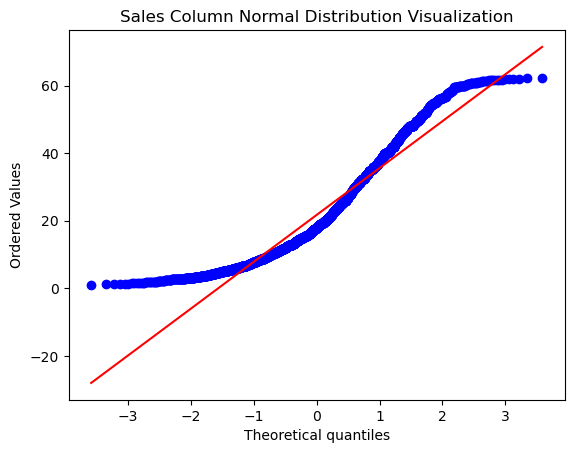

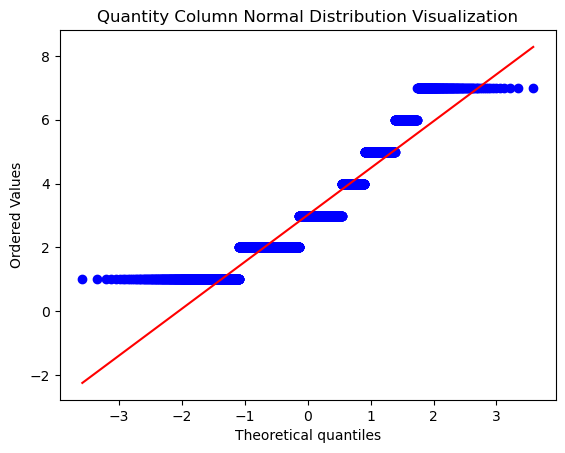

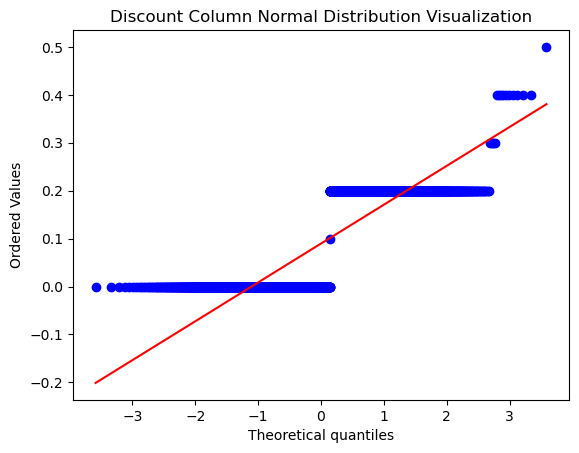

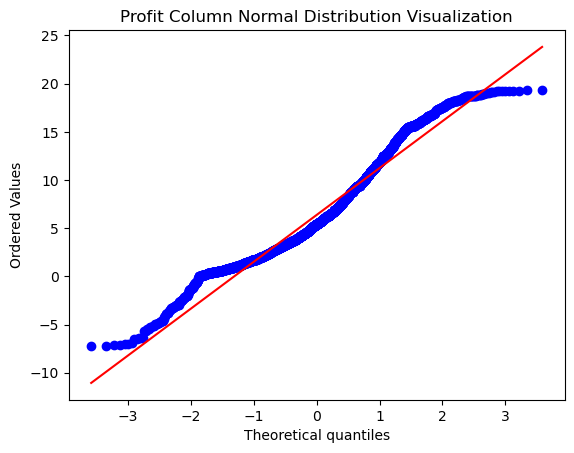

In [27]:
# Uji Distribusi Normal dengan Q-Q Plot

# Kolom Sales
sales_normal_distribution_qqplot = stats.probplot(df_saas_sales_normal_data['Sales'], dist = 'norm', plot = plt)
plt.title('Sales Column Normal Distribution Visualization')
plt.show(sales_normal_distribution_qqplot)

# Kolom Quantity
quantity_normal_distribution_qqplot = stats.probplot(df_saas_sales_normal_data['Quantity'], dist = 'norm', plot = plt)
plt.title('Quantity Column Normal Distribution Visualization')
plt.show(quantity_normal_distribution_qqplot)

# Kolom Discount
discount_normal_distribution_qqplot = stats.probplot(df_saas_sales_normal_data['Discount'], dist = 'norm', plot = plt)
plt.title('Discount Column Normal Distribution Visualization')
plt.show(discount_normal_distribution_qqplot)

# Kolom Profit
profit_normal_distribution_qqplot = stats.probplot(df_saas_sales_normal_data['Profit'], dist = 'norm', plot = plt)
plt.title('Profit Column Normal Distribution Visualization')
plt.show(profit_normal_distribution_qqplot)

Uji Distribusi Normal dengan Uji Frequentist

In [28]:
# Kolom Sales 

# Menggunakan Kolmogrov Smirnov
statistic, kstestpvalue = kstest(df_saas_sales_normal_data['Sales'], 'norm')
print(f'Kolmogorov Smirnov Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan Shapiro Wilk
statistic, shapiropvalue = shapiro(df_saas_sales_normal_data['Sales'])
print(f'Shapiro Wilk Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan D'Agostino and Pearson
statistic, pearsonpvalue = normaltest(df_saas_sales_normal_data['Sales'])
print(f'Pearson Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

Kolmogorov Smirnov Test Result: Data tidak terdistribusi Normal
Shapiro Wilk Test Result: Data tidak terdistribusi Normal
Pearson Test Result: Data tidak terdistribusi Normal


In [29]:
# Kolom Quantity 

# Menggunakan Kolmogrov Smirnov
statistic, kstestpvalue = kstest(df_saas_sales_normal_data['Quantity'], 'norm')
print(f'Kolmogorov Smirnov Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan Shapiro Wilk
statistic, shapiropvalue = shapiro(df_saas_sales_normal_data['Quantity'])
print(f'Shapiro Wilk Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan D'Agostino and Pearson
statistic, pearsonpvalue = normaltest(df_saas_sales_normal_data['Quantity'])
print(f'Pearson Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

Kolmogorov Smirnov Test Result: Data tidak terdistribusi Normal
Shapiro Wilk Test Result: Data tidak terdistribusi Normal
Pearson Test Result: Data tidak terdistribusi Normal


In [30]:
# Kolom Discount 

# Menggunakan Kolmogrov Smirnov
statistic, kstestpvalue = kstest(df_saas_sales_normal_data['Discount'], 'norm')
print(f'Kolmogorov Smirnov Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan Shapiro Wilk
statistic, shapiropvalue = shapiro(df_saas_sales_normal_data['Discount'])
print(f'Shapiro Wilk Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan D'Agostino and Pearson
statistic, pearsonpvalue = normaltest(df_saas_sales_normal_data['Discount'])
print(f'Pearson Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

Kolmogorov Smirnov Test Result: Data tidak terdistribusi Normal
Shapiro Wilk Test Result: Data tidak terdistribusi Normal
Pearson Test Result: Data tidak terdistribusi Normal


In [31]:
# Kolom Profit 

# Menggunakan Kolmogrov Smirnov
statistic, kstestpvalue = kstest(df_saas_sales_normal_data['Profit'], 'norm')
print(f'Kolmogorov Smirnov Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan Shapiro Wilk
statistic, shapiropvalue = shapiro(df_saas_sales_normal_data['Profit'])
print(f'Shapiro Wilk Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan D'Agostino and Pearson
statistic, pearsonpvalue = normaltest(df_saas_sales_normal_data['Profit'])
print(f'Pearson Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

Kolmogorov Smirnov Test Result: Data tidak terdistribusi Normal
Shapiro Wilk Test Result: Data tidak terdistribusi Normal
Pearson Test Result: Data tidak terdistribusi Normal


Setelah melakukan uji distribusi normal untuk semua kolom numerik (Sales, Quantity, Discount, Profit) tidak ada yang berdistribusi normal

Selanjutnya, kita bisa melakukan uji korelasi antar kolom numerik menggunakan method spearman

In [32]:
spearman_corr = df_saas_sales_normal_data[['Sales', 'Quantity', 'Discount', 'Profit']].corr(method='spearman')
print(spearman_corr)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.341519 -0.031988  0.702538
Quantity  0.341519  1.000000  0.013426  0.350943
Discount -0.031988  0.013426  1.000000 -0.320678
Profit    0.702538  0.350943 -0.320678  1.000000


Melakukan visualisasi dengan heatmap

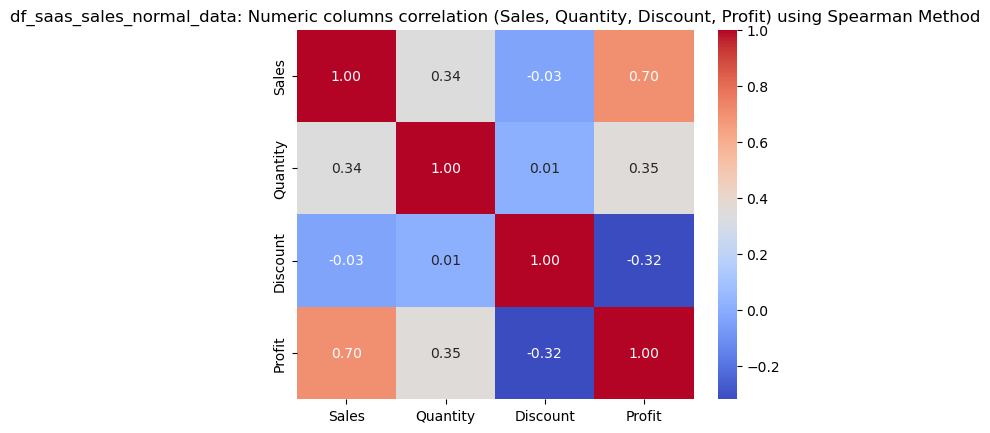

In [33]:
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('df_saas_sales_normal_data: Numeric columns correlation (Sales, Quantity, Discount, Profit) using Spearman Method')
plt.show()

Visualisasi untuk melihat Produk dengan Profit terbanyak ke paling sedikit

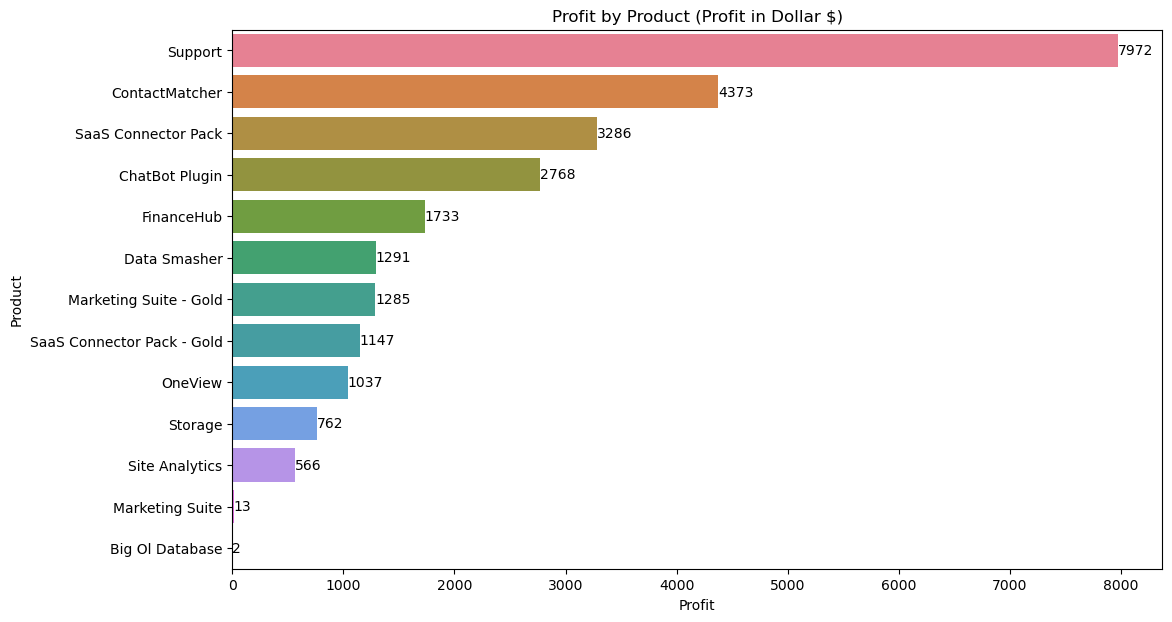

In [34]:
plt.figure(figsize=(12, 7))
profit_by_product = df_saas_sales_normal_data.groupby('Product')['Profit'].sum().sort_values(ascending = False).reset_index()
profit_by_product_barplot = sns.barplot(
    data = profit_by_product,
    x = 'Profit',
    y = 'Product',
    hue = 'Product'
)
for container in profit_by_product_barplot.containers:
    profit_by_product_barplot.bar_label(container, fmt='%.0f')
plt.title('Profit by Product (Profit in Dollar $)')
plt.show()


Visualisasi Penjualan (Sales) berdasarkan Negara (Country) dari 5 Negara dengan Penjualan terbanyak ke paling sedikit

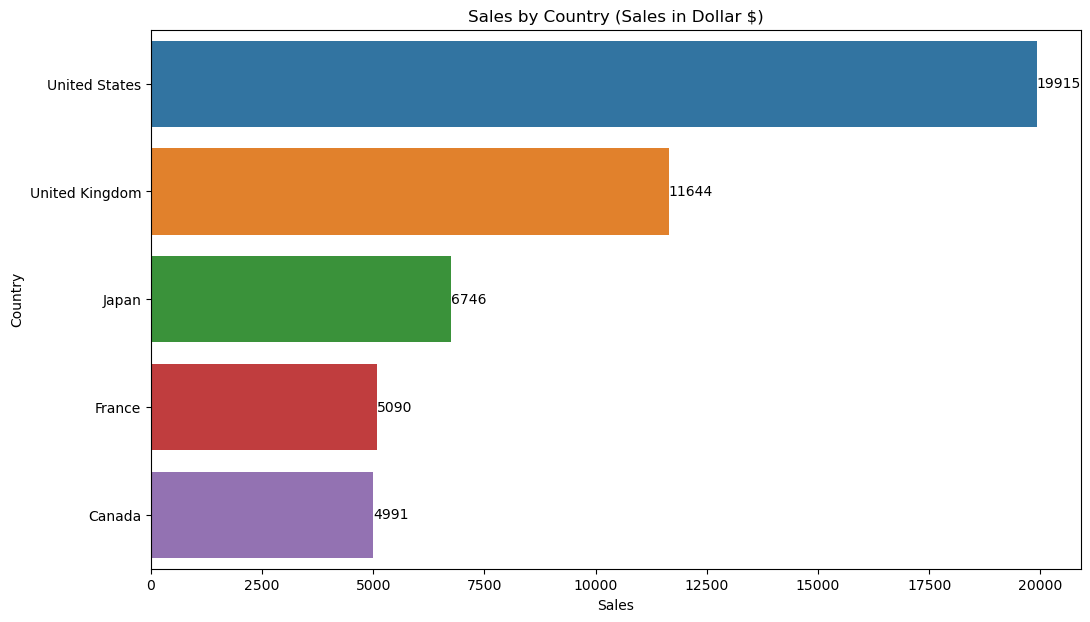

In [35]:
plt.figure(figsize=(12, 7))
sales_by_country = df_saas_sales_normal_data.groupby('Country')['Sales'].sum().sort_values(ascending = False).reset_index().head(5)
sales_by_country_barplot = sns.barplot(
    data = sales_by_country,
    x = 'Sales',
    y = 'Country',
    hue = 'Country'
)
for container in sales_by_country_barplot.containers:
    sales_by_country_barplot.bar_label(container, fmt='%.0f')
plt.title('Sales by Country (Sales in Dollar $)')
plt.show()

Visualisasi Produk yang paling banyak menghasilkan profit dari setiap negara

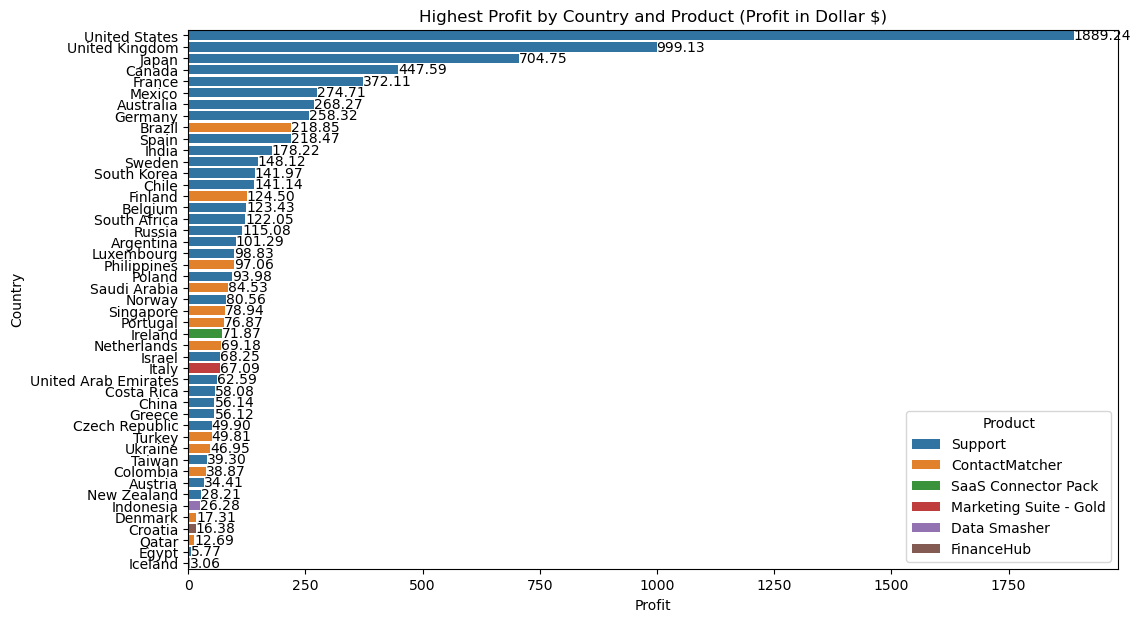

In [36]:
# Mengelompokkan data berdasarkan negara dan produk, lalu menghitung total profit untuk setiap kombinasi
profit_by_country_product = df_saas_sales_normal_data.groupby(['Country', 'Product'])[['Discount', 'Profit']].sum().reset_index()

# Mengambil produk dengan profit tertinggi untuk setiap negara
highest_profit_by_country_product = profit_by_country_product.loc[profit_by_country_product.groupby('Country')['Profit'].idxmax()].sort_values(by = 'Profit', ascending = False).reset_index(drop=True)

plt.figure(figsize=(12, 7))
highest_profit_by_country_product_barplot = sns.barplot(
    data=highest_profit_by_country_product,
    x='Profit',
    y='Country',
    hue='Product'
)
for container in highest_profit_by_country_product_barplot.containers:
    highest_profit_by_country_product_barplot.bar_label(container, fmt='%.2f')
plt.title('Highest Profit by Country and Product (Profit in Dollar $)')
plt.show()

Visualisasi total negara yang membeli produk unggulan di negara tersebut

Text(0, 0.5, 'Product')

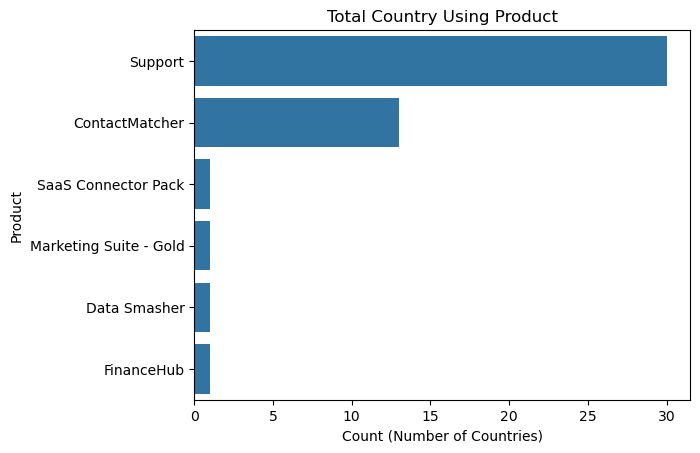

In [37]:
product_counts = highest_profit_by_country_product['Product'].value_counts()
product_profits = highest_profit_by_country_product.groupby('Product')['Profit'].sum()

df_temp = pd.DataFrame({
    'Count': product_counts,
    'Total Profit': product_profits
})

product_summary = df_temp.sort_values(by = 'Total Profit', ascending = False).reset_index()

product_summary_barplot = sns.barplot(
    data = product_summary,
    x = 'Count',
    y = product_summary['index']
)

plt.title('Total Country Using Product')
plt.xlabel('Count (Number of Countries)')
plt.ylabel('Product')

Visualisasi korelasi antara Discount dan Profit, apakah kalau discountnya besar profitnya naik

Karena setelah dihitung, korelasi Discount dan Profit adalah -0,7 -> Artinya kalau discountnya besar profitnya menurun

   Discount      Sales      Profit
0       0.0  49902.730  17694.6754
1       0.2  38999.752   8561.7986
2       0.1     29.403      5.2272
3       0.5     32.985     -1.9791
4       0.3    180.796     -7.2156
5       0.4    222.924    -15.7814


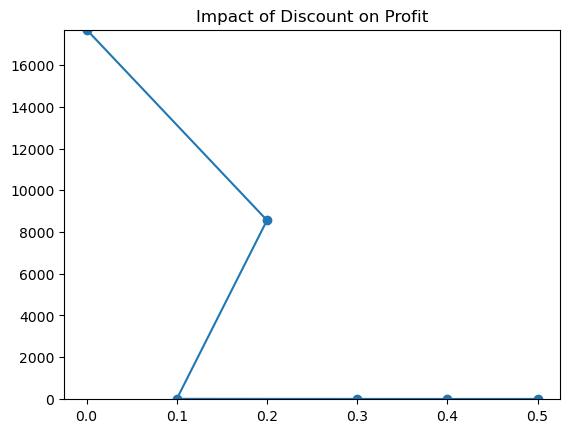

In [38]:
discount_impact = df_saas_sales_normal_data.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Profit', ascending=False).reset_index()
print(discount_impact)

plt.ylim(min(discount_impact['Profit']), max(discount_impact['Profit']))
plt.plot(discount_impact['Discount'], discount_impact['Profit'], marker='o')
plt.title('Impact of Discount on Profit')
plt.show()

Visualisasi Sales Trend berdasarkan bulan untuk setiap tahun

Text(0, 0.5, 'Sales (in Dollar $)')

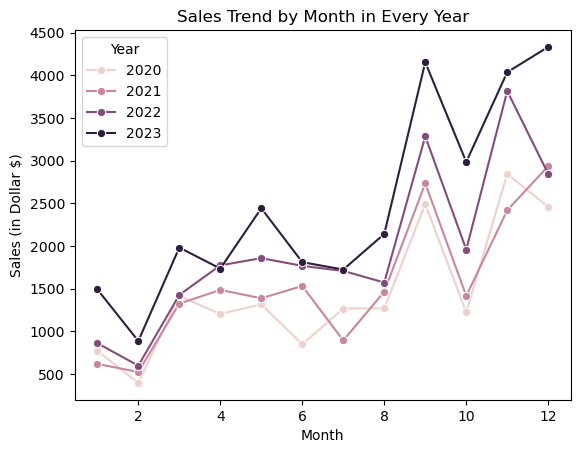

In [39]:
df_saas_sales_normal_data['Month'] = pd.to_datetime(df_saas_sales_normal_data['Order Date']).dt.month
df_saas_sales_normal_data['Year'] = pd.to_datetime(df_saas_sales_normal_data['Order Date']).dt.year
sales_trend_by_month_in_every_year = df_saas_sales_normal_data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

sales_trend_by_month_in_every_year

sns.lineplot(
    data = sales_trend_by_month_in_every_year,
    x = 'Month',
    y = 'Sales',
    hue = 'Year',
    marker = 'o'
)

plt.title('Sales Trend by Month in Every Year')
plt.ylabel('Sales (in Dollar $)')

Visualisasi Profit Trend berdasarkan bulan untuk setiap tahun

Text(0, 0.5, 'Profit (in Dollar $)')

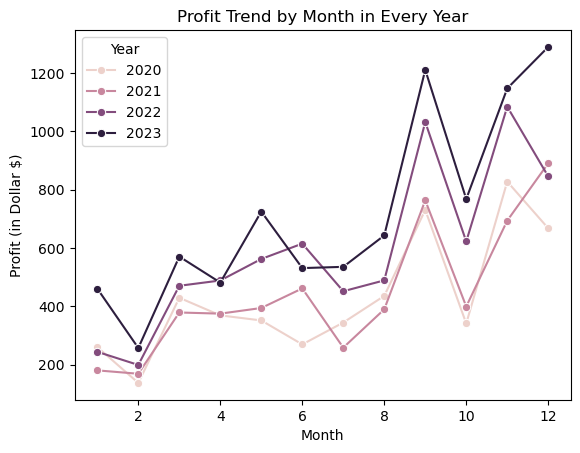

In [40]:
profit_trend_by_month_in_every_year = df_saas_sales_normal_data.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

profit_by_country_product

sns.lineplot(
    data = profit_trend_by_month_in_every_year,
    x = 'Month',
    y = 'Profit',
    hue = 'Year',
    marker = 'o'
)

plt.title('Profit Trend by Month in Every Year')
plt.ylabel('Profit (in Dollar $)')

Visualisasi Sales Trend berdasarkan Tahun

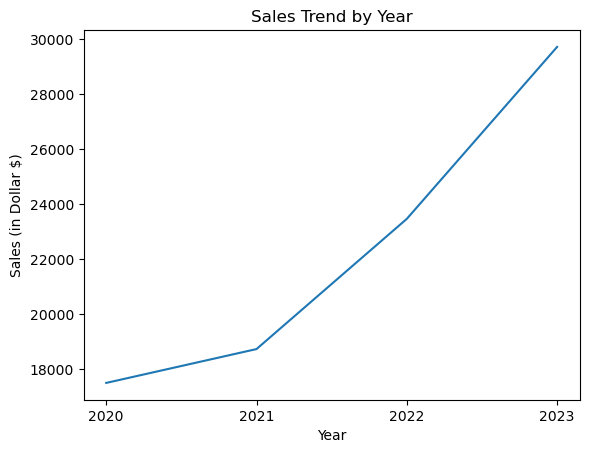

In [41]:
sales_trend_by_year = df_saas_sales_normal_data.groupby('Year')['Sales'].sum().reset_index()

sns.lineplot(
    data = sales_trend_by_year,
    x = 'Year',
    y = 'Sales'
)

plt.xticks(sales_trend_by_year['Year'], sales_trend_by_year['Year'].astype(int))
plt.xlabel('Year')
plt.ylabel('Sales (in Dollar $)')
plt.title('Sales Trend by Year')
plt.show()


Visualisasi Profit Trend berdasarkan Tahun

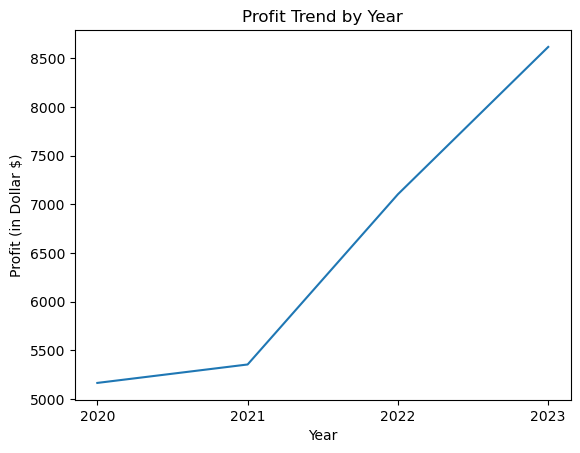

In [42]:
profit_trend_by_year = df_saas_sales_normal_data.groupby('Year')['Profit'].sum().reset_index()

profit_trend_by_year

sns.lineplot(
    data = profit_trend_by_year,
    x = 'Year',
    y = 'Profit'
)

plt.xticks(profit_trend_by_year['Year'], profit_trend_by_year['Year'].astype(int))
plt.xlabel('Year')
plt.ylabel('Profit (in Dollar $)')
plt.title('Profit Trend by Year')
plt.show()

Visualisasi korelasi antara Sales dan Profit, apakah kalau salesnya naik profitnya juga naik

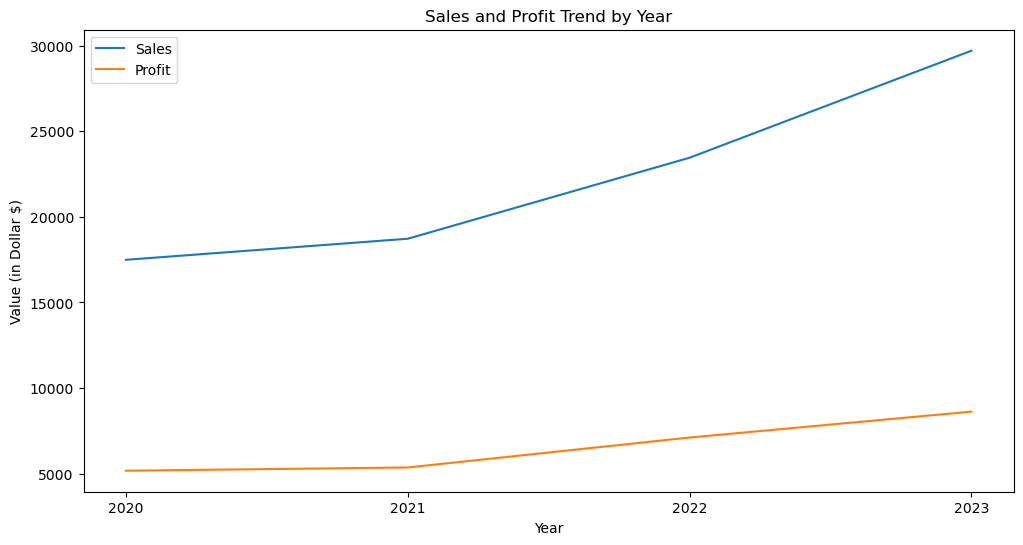

In [43]:
# Visualisasi Sales Trend berdasarkan Tahun
plt.figure(figsize=(12, 6))
sns.lineplot(
    data = sales_trend_by_year,
    x = 'Year',
    y = 'Sales',
    label = 'Sales'
)

# Visualisasi Profit Trend berdasarkan Tahun
sns.lineplot(
    data = profit_trend_by_year,
    x = 'Year',
    y = 'Profit',
    label = 'Profit'
)

plt.xticks(sales_trend_by_year['Year'], sales_trend_by_year['Year'].astype(int))
plt.xlabel('Year')
plt.ylabel('Value (in Dollar $)')
plt.title('Sales and Profit Trend by Year')
plt.legend()
plt.show()

In [44]:
df_saas_sales_normal_data, df_saas_sales_outliers_data = remove_outliers_data(df_saas_sales, ['Sales', 'Quantity', 'Discount', 'Profit'])

df_saas_sales_outliers_data

Tidak ada lagi outlier


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
1,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
2,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
3,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,43NZ37VE2D,1706.1840,9,0.20,85.3092
4,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,JG14MOU94R,911.4240,4,0.20,68.3568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5874,APJ-2022-121601,2022-10-05,Max McGrath,Japan,Kyoto,APJ,JAPN,Mitsubishi,1050,Manufacturing,SMB,SaaS Connector Pack - Gold,H11K6JRU46,59.7520,7,0.20,19.4194
5875,APJ-2023-157966,2023-03-14,Molly Watson,Australia,Sydney,APJ,ANZ,Philip Morris International,1075,Consumer Products,Enterprise,Site Analytics,MJ1YVJUYUK,34.3600,1,0.20,-7.3015
5876,AMER-2021-129917,2021-10-02,Sophie Vance,United States,New York City,AMER,NAMER,Aetna,1002,Healthcare,SMB,ContactMatcher,436CHUGFM2,53.5680,4,0.20,19.4184
5877,EMEA-2023-142125,2023-10-22,Gabrielle Ogden,Italy,Milan,EMEA,EU,Royal Dutch Shell,1031,Energy,Strategic,ContactMatcher,38X1QHQQE5,38.8200,6,0.00,19.4100


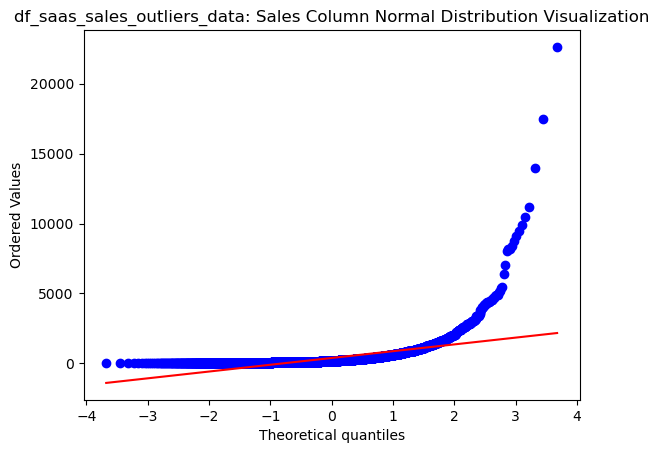

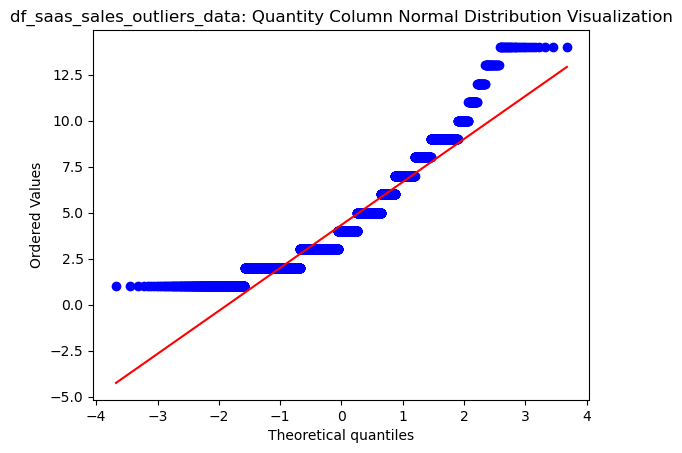

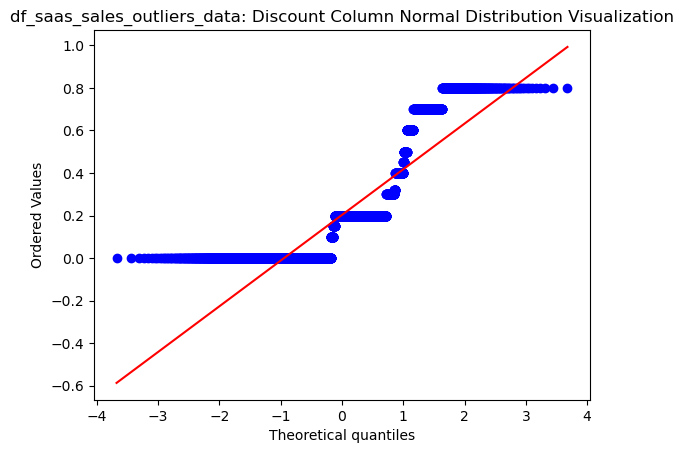

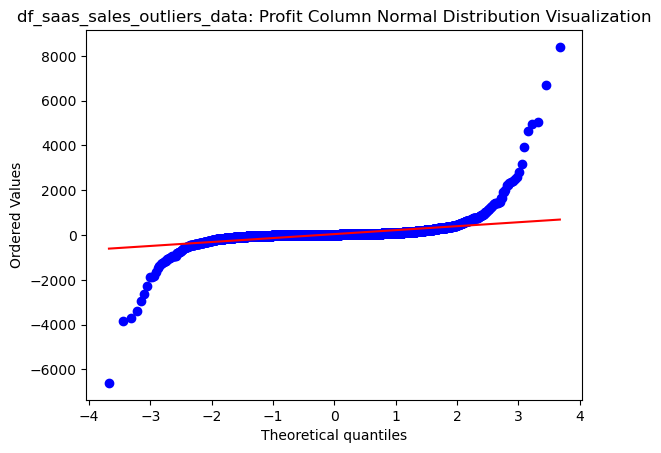

In [45]:
# Uji Distribusi Normal dengan Q-Q Plot

# Kolom Sales
sales_normal_distribution_qqplot = stats.probplot(df_saas_sales_outliers_data['Sales'], dist = 'norm', plot = plt)
plt.title('df_saas_sales_outliers_data: Sales Column Normal Distribution Visualization')
plt.show(sales_normal_distribution_qqplot)

# Kolom Quantity
quantity_normal_distribution_qqplot = stats.probplot(df_saas_sales_outliers_data['Quantity'], dist = 'norm', plot = plt)
plt.title('df_saas_sales_outliers_data: Quantity Column Normal Distribution Visualization')
plt.show(quantity_normal_distribution_qqplot)

# Kolom Discount
discount_normal_distribution_qqplot = stats.probplot(df_saas_sales_outliers_data['Discount'], dist = 'norm', plot = plt)
plt.title('df_saas_sales_outliers_data: Discount Column Normal Distribution Visualization')
plt.show(discount_normal_distribution_qqplot)

# Kolom Profit
profit_normal_distribution_qqplot = stats.probplot(df_saas_sales_outliers_data['Profit'], dist = 'norm', plot = plt)
plt.title('df_saas_sales_outliers_data: Profit Column Normal Distribution Visualization')
plt.show(profit_normal_distribution_qqplot)

In [46]:
# Kolom Sales 

# Menggunakan Kolmogrov Smirnov
statistic, kstestpvalue = kstest(df_saas_sales_outliers_data['Sales'], 'norm')
print(f'Kolmogorov Smirnov Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan D'Agostino and Pearson
statistic, pearsonpvalue = normaltest(df_saas_sales_outliers_data['Sales'])
print(f'Pearson Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

Kolmogorov Smirnov Test Result: Data tidak terdistribusi Normal
Pearson Test Result: Data tidak terdistribusi Normal


In [47]:
# Kolom Quantity 

# Menggunakan Kolmogrov Smirnov
statistic, kstestpvalue = kstest(df_saas_sales_outliers_data['Quantity'], 'norm')
print(f'Kolmogorov Smirnov Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan D'Agostino and Pearson
statistic, pearsonpvalue = normaltest(df_saas_sales_outliers_data['Quantity'])
print(f'Pearson Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

Kolmogorov Smirnov Test Result: Data tidak terdistribusi Normal
Pearson Test Result: Data tidak terdistribusi Normal


In [48]:
# Kolom Discount 

# Menggunakan Kolmogrov Smirnov
statistic, kstestpvalue = kstest(df_saas_sales_outliers_data['Discount'], 'norm')
print(f'Kolmogorov Smirnov Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan D'Agostino and Pearson
statistic, pearsonpvalue = normaltest(df_saas_sales_outliers_data['Discount'])
print(f'Pearson Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

Kolmogorov Smirnov Test Result: Data tidak terdistribusi Normal
Pearson Test Result: Data tidak terdistribusi Normal


In [49]:
# Kolom Profit 

# Menggunakan Kolmogrov Smirnov
statistic, kstestpvalue = kstest(df_saas_sales_outliers_data['Profit'], 'norm')
print(f'Kolmogorov Smirnov Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan D'Agostino and Pearson
statistic, pearsonpvalue = normaltest(df_saas_sales_outliers_data['Profit'])
print(f'Pearson Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

Kolmogorov Smirnov Test Result: Data tidak terdistribusi Normal
Pearson Test Result: Data tidak terdistribusi Normal


             Sales  Quantity  Discount    Profit
Sales     1.000000  0.141678 -0.258512  0.451670
Quantity  0.141678  1.000000 -0.097350  0.139343
Discount -0.258512 -0.097350  1.000000 -0.671229
Profit    0.451670  0.139343 -0.671229  1.000000


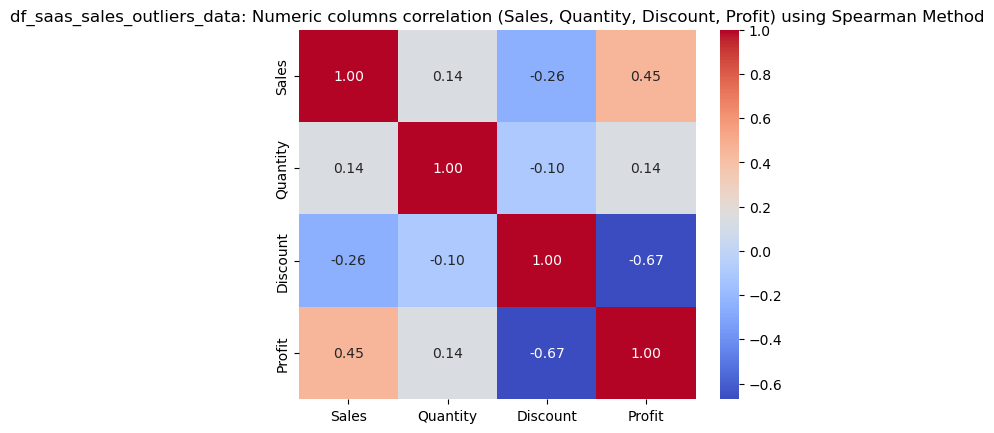

In [50]:
spearman_corr = df_saas_sales_outliers_data[['Sales', 'Quantity', 'Discount', 'Profit']].corr(method='spearman')
print(spearman_corr)

sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('df_saas_sales_outliers_data: Numeric columns correlation (Sales, Quantity, Discount, Profit) using Spearman Method')
plt.show()

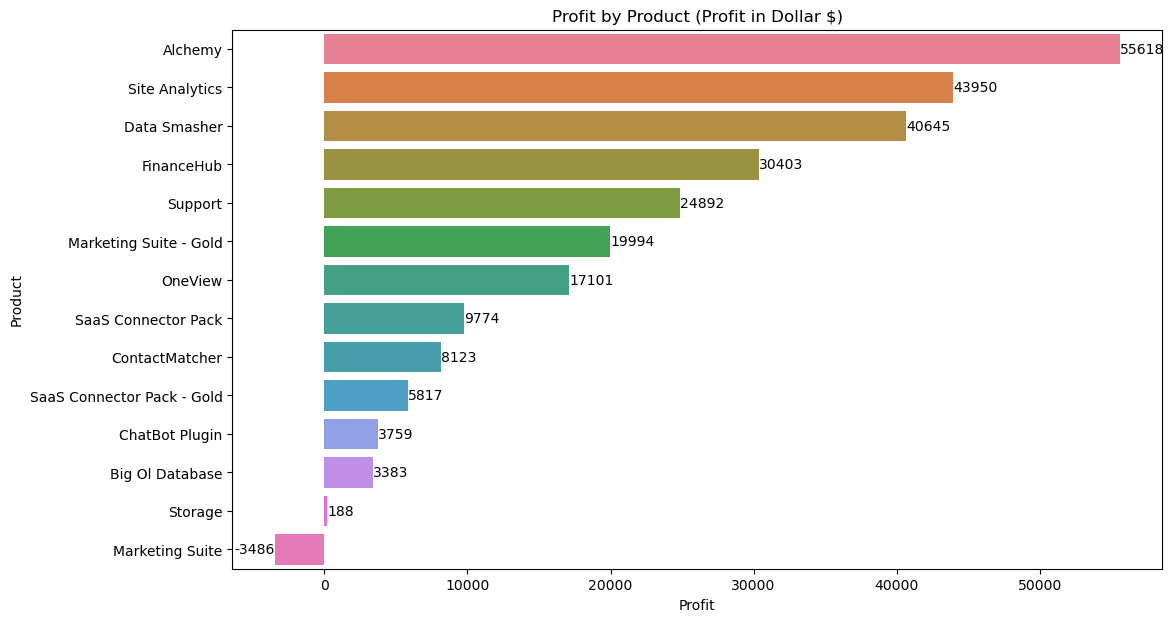

In [51]:
plt.figure(figsize=(12, 7))
profit_by_product = df_saas_sales_outliers_data.groupby('Product')['Profit'].sum().sort_values(ascending = False).reset_index()
profit_by_product_barplot = sns.barplot(
    data = profit_by_product,
    x = 'Profit',
    y = 'Product',
    hue = 'Product'
)
for container in profit_by_product_barplot.containers:
    profit_by_product_barplot.bar_label(container, fmt='%.0f')
plt.title('Profit by Product (Profit in Dollar $)')
plt.show()

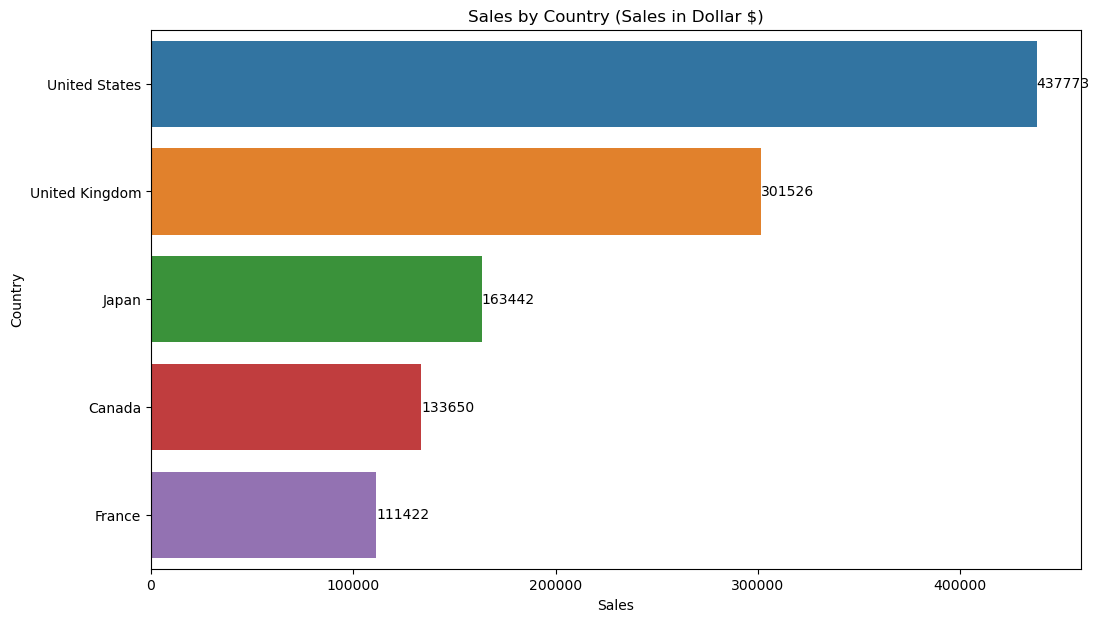

In [52]:
plt.figure(figsize=(12, 7))
sales_by_country = df_saas_sales_outliers_data.groupby('Country')['Sales'].sum().sort_values(ascending = False).reset_index().head(5)
sales_by_country_barplot = sns.barplot(
    data = sales_by_country,
    x = 'Sales',
    y = 'Country',
    hue = 'Country'
)
for container in sales_by_country_barplot.containers:
    sales_by_country_barplot.bar_label(container, fmt='%.0f')
plt.title('Sales by Country (Sales in Dollar $)')
plt.show()